In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy.linalg as la
from scipy.interpolate import lagrange
from scipy.interpolate import CubicHermiteSpline
import scipy.interpolate
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import newton, bisect, root_scalar, fixed_point
from scipy.integrate import trapezoid, simpson

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: Soleil Dayana Niño Murcia
1033097666

*Métodos computacionales 2024-II*

---

## Funciones de diferenciacion numérica

In [4]:
def forward_diff(y, x, h):
    return (y[1] - y[0]) / (x[1] - x[0])

def backward_diff(y, x, h):
    x = np.array(x)
    y = np.array(y)
    return (y[-1] - y[-2]) / (x[-1] - x[-2])

def centered_diff(y, x, h):
    x, y = np.array(x), np.array(y)
    return (y[1:] - y[:-1]) / (x[1:] - x[:-1])

def three_point_diff(y, x, h):
    x = np.array(x)
    y = np.array(y)

    # Calcular la derivada para el primer punto usando la fórmula de tres puntos hacia adelante
    derivada_inicio = (-3*y[0] + 4*y[1] - y[2]) / (2*h)

    # Calcular la derivada para el último punto usando la fórmula de tres puntos hacia atrás
    derivada_fin = (3*y[-1] - 4*y[-2] + y[-3]) / (2*h)

    # Calcular la derivada para los puntos intermedios usando la fórmula de tres puntos centrada
    derivada_centro = (y[2:] - y[:-2]) / (2*h)

    # Combinar las derivadas
    derivada = np.concatenate(([derivada_inicio], derivada_centro, [derivada_fin]))

    return derivada

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente

In [5]:
L = 0.98 # Inductancia (H)
R = 0.142 # Resistencia (Ω)

In [6]:
# a. DataFrame de Corriente y Tiempo
data = {
    'Tiempo': [1.00, 1.01,  1.02, 1.03, 1.04],
    'Corriente' : [3.10, 3.12, 3.14, 3.18, 3.24]
}

df = pd.DataFrame(data)
df

,Tiempo,Corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


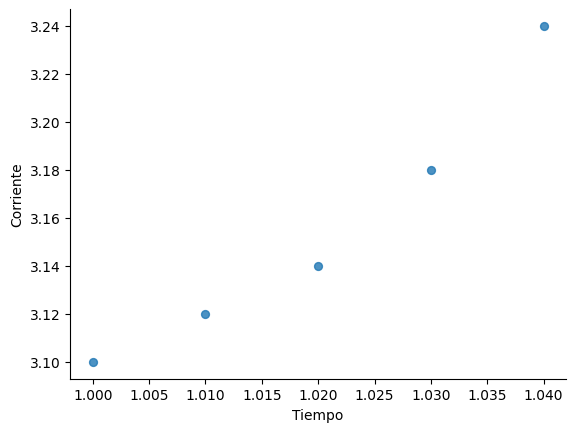

In [7]:
df.plot(kind='scatter', x='Tiempo', y='Corriente', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.

In [8]:
i, t,  h = df['Corriente'], df['Tiempo'], 0.01
di_dt = centered_diff(i, t, h)
di_dt

array([2., 2., 4., 6.])

In [9]:
di_dt_3puntos = three_point_diff(i, t, h)
di_dt_3puntos

array([2., 2., 3., 5., 7.])

- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [10]:
interpolacion = lagrange(t, i)
interpolacion

poly1d([ -83333.33333335,  341666.66666669, -525191.66666673,
        358719.83333332,  -91858.39999999])

In [11]:
x = sp.Symbol('x')
p = sp.Poly(interpolacion, x)  # Convertir el polinomio de Lagrange a un polinomio de SymPy
derivada_inter = sp.diff(p, x)

In [12]:
voltaje_finitas = L * di_dt + R * i[1:]
voltaje_3puntos = L * di_dt_3puntos + R * i

In [13]:
derivada_numerica = np.array([derivada_inter.subs({x: val}) for val in t]) # Evalúa la derivada en los puntos de tiempo

voltaje_interpolacion = L * derivada_numerica + R * i # Calcular el voltaje usando la derivada del polinomio de interpolacion

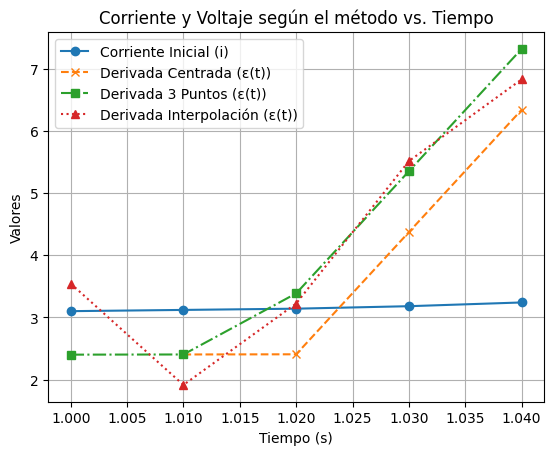

In [14]:
plt.plot(t, i, label='Corriente Inicial (i)', marker='o', linestyle='-')
plt.plot(t[1:], voltaje_finitas, label='Derivada Centrada (ε(t))', marker='x', linestyle='--')
plt.plot(t, voltaje_3puntos, label='Derivada 3 Puntos (ε(t))', marker='s', linestyle='-.')
plt.plot(t, voltaje_interpolacion, label='Derivada Interpolación (ε(t))', marker='^', linestyle=':')

plt.xlabel('Tiempo (s)')
plt.ylabel('Valores')
plt.title('Corriente y Voltaje según el método vs. Tiempo')
plt.legend()
plt.grid(True)
plt.show()

# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

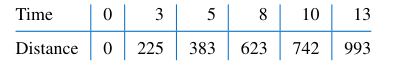



In [15]:
tabla1 = {'Tiempo' : [0, 3, 5, 8, 10, 13],
          'Distancia' : [0, 225,  383, 623, 742, 993]}
df_2 = pd.DataFrame(tabla1)
df_2

,Tiempo,Distancia
0,0,0
1,3,225
2,5,383
3,8,623
4,10,742
5,13,993


Para conocer la velocidad instantánea, podemos aplicar el método de diferencias finitas, para aproximar una derivada de nuestros datos discretos, ya que no tenemos una función exacta que describa el comportamiento.

In [16]:
distancia, tiempo, h = df_2['Distancia'], df_2['Tiempo'], 0.01
velocidad = centered_diff(distancia, tiempo, h)
v1 = backward_diff(distancia, tiempo, h)
v2 = forward_diff(distancia, tiempo, h)
# Velocidad instantánea para cada punto
print("Velocidad instantánea en cada punto:")
for i in range(len(velocidad)):
  print(f"t = {tiempo[i+1]}: {velocidad[i]:.3}")


Velocidad instantánea en cada punto:
t = 3: 75.0
t = 5: 79.0
t = 8: 80.0
t = 10: 59.5
t = 13: 83.7


In [17]:
# Interpolación para estimar la velocidad en t=12
interpolacion_distancia = lagrange(tiempo, distancia)
x = sp.Symbol('x')
p_distancia = sp.Poly(interpolacion_distancia, x)
derivada_distancia = sp.diff(p_distancia, x)
velocidad_t12 = derivada_distancia.subs({x:12})
print(f"Velocidad en t=12 (usando interpolación): {velocidad_t12:.3}")

Velocidad en t=12 (usando interpolación): 91.7


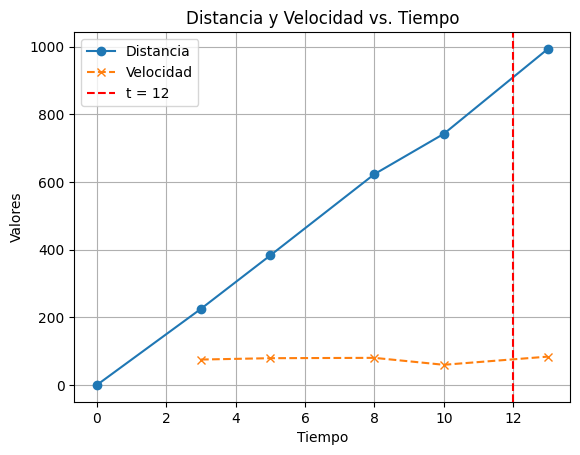

In [18]:
# Gráfica de distancia y velocidad
plt.plot(tiempo, distancia, label='Distancia', marker='o', linestyle='-')
plt.plot(tiempo[1:], velocidad, label='Velocidad', marker='x', linestyle='--')
plt.axvline(x=12, color='r', linestyle='--', label='t = 12')
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Distancia y Velocidad vs. Tiempo')
plt.legend()
plt.grid(True)
plt.show()

# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

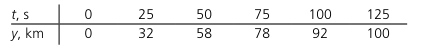

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

In [19]:
def centered_diff_2(y, x): # Esta funcion no usa los saltos de los pasos
    x, y = np.array(x), np.array(y)
    return (y[1:] - y[:-1]) / (x[1:] - x[:-1])

tabla3 = {'Tiempo': np.array([0, 25, 50, 75, 100, 125]),
          'Distancia': np.array( [0, 32, 58, 78, 92, 100])}
df_3 = pd.DataFrame(tabla3)

tiempo = np.array(df_3['Tiempo'])
distancia = np.array(df_3['Distancia'] )

df_3

,Tiempo,Distancia
0,0,0
1,25,32
2,50,58
3,75,78
4,100,92
5,125,100


In [23]:
velocidad = np.gradient(distancia, tiempo)
aceleracion = np.gradient(velocidad, tiempo)

for i, v in enumerate(velocidad):
    print(f"t =  {tiempo[i]} s, v = {v:.4f} m/s")

print("\nAceleración (a) en cada punto (m/s²):")
for i, a in enumerate(aceleracion):
    print(f"t =  {tiempo[i]} s, a = {a:.4f} m/s²")

t =  0 s, v = 1.2800 m/s
t =  25 s, v = 1.1600 m/s
t =  50 s, v = 0.9200 m/s
t =  75 s, v = 0.6800 m/s
t =  100 s, v = 0.4400 m/s
t =  125 s, v = 0.3200 m/s

Aceleración (a) en cada punto (m/s²):
t =  0 s, a = -0.0048 m/s²
t =  25 s, a = -0.0072 m/s²
t =  50 s, a = -0.0096 m/s²
t =  75 s, a = -0.0096 m/s²
t =  100 s, a = -0.0072 m/s²
t =  125 s, a = -0.0048 m/s²


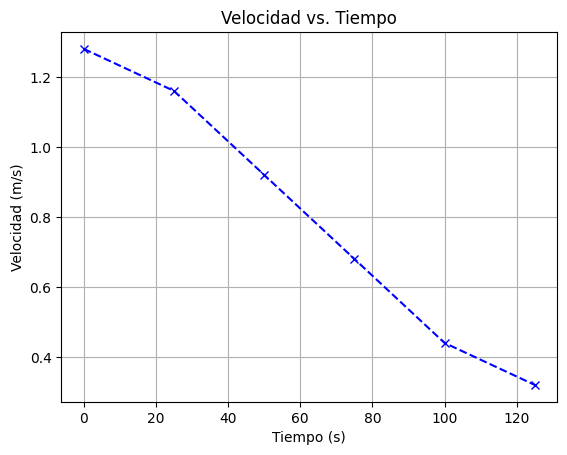

In [24]:
plt.plot(tiempo, velocidad,marker="x", linestyle="--", color="blue")

plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad vs. Tiempo")
plt.grid(True)

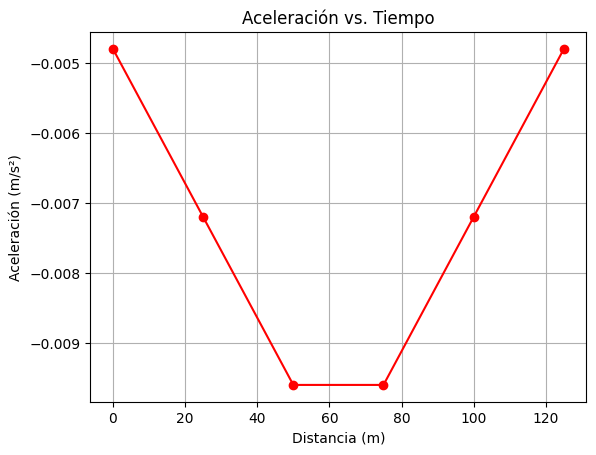

In [26]:
plt.plot(tiempo, aceleracion, marker="o", linestyle="-", color="red")

plt.xlabel("Distancia (m)")
plt.ylabel("Aceleración (m/s²)")
plt.title("Aceleración vs. Tiempo")
plt.grid(True)

#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

In [27]:
r = 0.0001 # metros
z, kqtot, R = sp.symbols('z kqtot R')

V = kqtot / sp.sqrt(z**2 + R**2) # Potencial eléctrico
V

kqtot/sqrt(R**2 + z**2)

In [28]:
V_rescaled = V/kqtot
V_rescaled

1/sqrt(R**2 + z**2)

In [29]:
E_z_sympy = -sp.diff(V, z) # Campo eléctrico mediante sympy
E_z_sympy

kqtot*z/(R**2 + z**2)**(3/2)

In [32]:
# b
z_points = np.linspace(0.0001, 0.001, 10000)
V_func = sp.lambdify([z, R], V_rescaled, 'numpy')
V_vals = V_func(z_points, r)
E_vals = -np.gradient(V_vals, z_points)
E_at_z_val = np.interp(r, z_points, E_vals) # calculo del campo en un punto específico con interpolación
print(f"Campo eléctrico (Ez) en z = {r} m usando np.gradient: \n {E_vals[0]:.3}")

Campo eléctrico (Ez) en z = 0.0001 m usando np.gradient: 
 3.53e+07


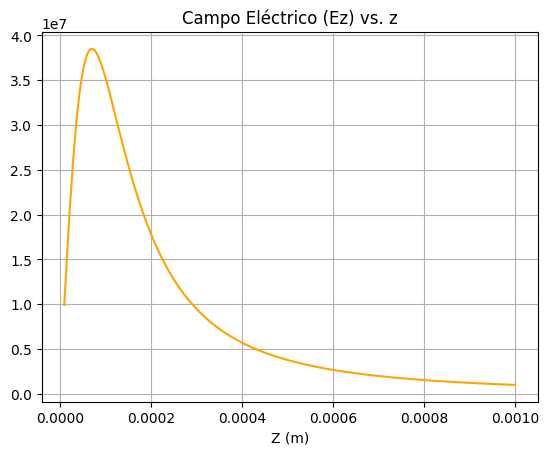

In [31]:
# c
z_values = np.linspace(0.00001, 0.001, 10000)  # Valores de z > 0
V_values = V_func(z_values, r)
E_values = -np.gradient(V_values, z_values)

plt.figure()
plt.plot(z_values, E_values, color = "orange")
plt.xlabel("Z (m)")
plt.title("Campo Eléctrico (Ez) vs. z")
plt.grid(True)